In [1]:
#Import Libraries
import ast
import pandas as pd 
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [9]:
# Only get data analyst jobs
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']== 'United States')].copy()

# Drop NaN values from the columnfor plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US['salary_year_avg'].sample(10)


421208    110000.0
204344     82500.0
674290     95000.0
734485     76500.0
411251     52900.0
41399     100000.0
304291     57500.0
562519     58000.0
92599      85000.0
45742      77500.0
Name: salary_year_avg, dtype: float64

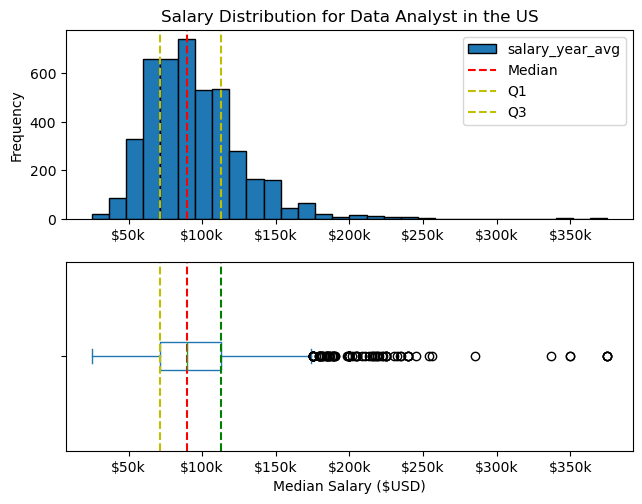

In [54]:
import matplotlib.pyplot as plt

# Calculate statistics
median = df_DA_US['salary_year_avg'].median()
q1 = df_DA_US['salary_year_avg'].quantile(0.25)
q3 = df_DA_US['salary_year_avg'].quantile(0.75)

fig, ax = plt.subplots(2, 1)
fig.tight_layout(h_pad=1)

# Histogram Plot
df_DA_US['salary_year_avg'].plot(kind='hist', ax=ax[0], bins=30, edgecolor='black')
ax[0].set_title('Salary Distribution for Data Analyst in the US')
ax[0].set_xlabel('')
ax[0].set_ylabel('Frequency')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '${0:g}k'.format(x/1000)))
# Add vertical lines with legends
ax[0].axvline(median, color='r', linestyle='--', label='Median')
ax[0].axvline(q1, color='y', linestyle='--', label='Q1')
ax[0].axvline(q3, color='y', linestyle='--', label='Q3')
ax[0].legend()

# Box Plot
df_DA_US['salary_year_avg'].plot(kind='box', ax=ax[1], vert=False)
ax[1].set_yticklabels([])
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:'${0:g}k'.format(x/1000)))
# Add vertical lines with legends
ax[1].axvline(median, color='r', linestyle='--', label='Median')
ax[1].axvline(q1, color='y', linestyle='--', label='Q1')
ax[1].axvline(q3, color='g', linestyle='--', label='Q3')


plt.show()


In [99]:
job_list[0]

109        89000.0
180        90250.0
410       133285.0
988        62623.0
1413       71300.0
            ...   
782637     70000.0
782798    111175.0
783588    125000.0
783866    115000.0
784882     87500.0
Name: salary_year_avg, Length: 4350, dtype: float64

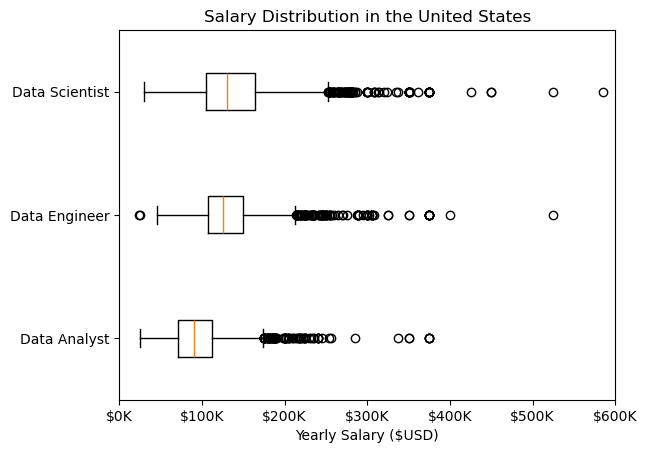

In [118]:

# Define the job titles of interest
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# Filter the DataFrame for the selected job titles and for jobs in the United States
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

# Create a list of salary series for each job title
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

# Create a horizontal boxplot
plt.boxplot(job_list, vert=False)

# Set plot title and x-axis label
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')

# Set y-axis tick labels to display the job titles
plt.yticks(ticks=range(1, len(job_titles) + 1), labels=job_titles)

# Define a formatter for the x-axis to show values like "$150K"
formatter = ticker.FuncFormatter(lambda x, pos: f'${int(x/1000)}K')
plt.gca().xaxis.set_major_formatter(formatter)

plt.xlim(0, 600000)

# Display the plot
plt.show()
